In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("Mall_Customers.csv")

In [ ]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


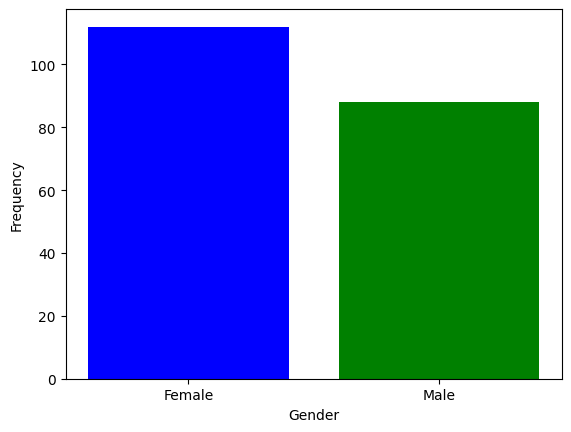

In [ ]:
gender_counts = dataset['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values,color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

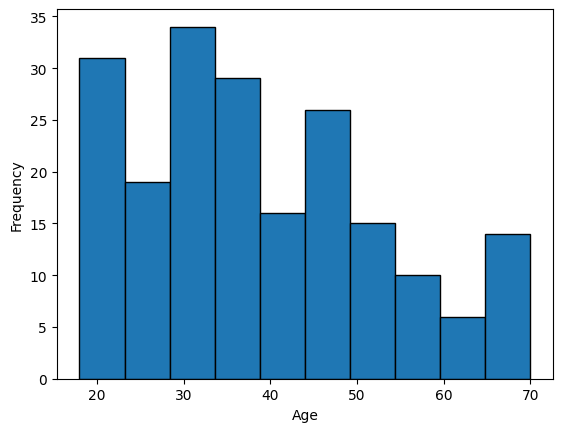

In [ ]:
fig = plt.hist(dataset['Age'], bins=10,histtype='bar', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

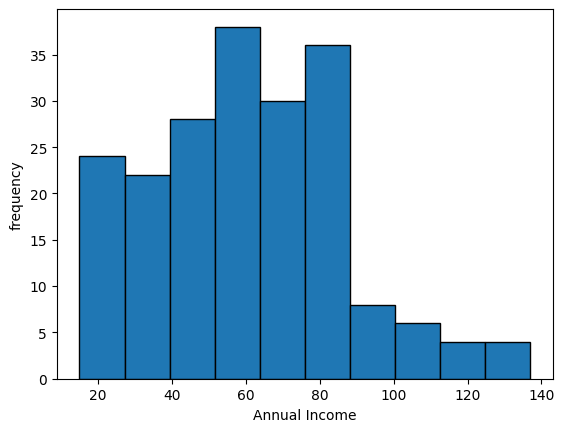

In [ ]:
fig = plt.hist(dataset['Annual Income (k$)'],histtype='bar', edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('frequency')
plt.show()

In [ ]:
print(dataset['Age'].max())
print(dataset['Age'].min())

70
18


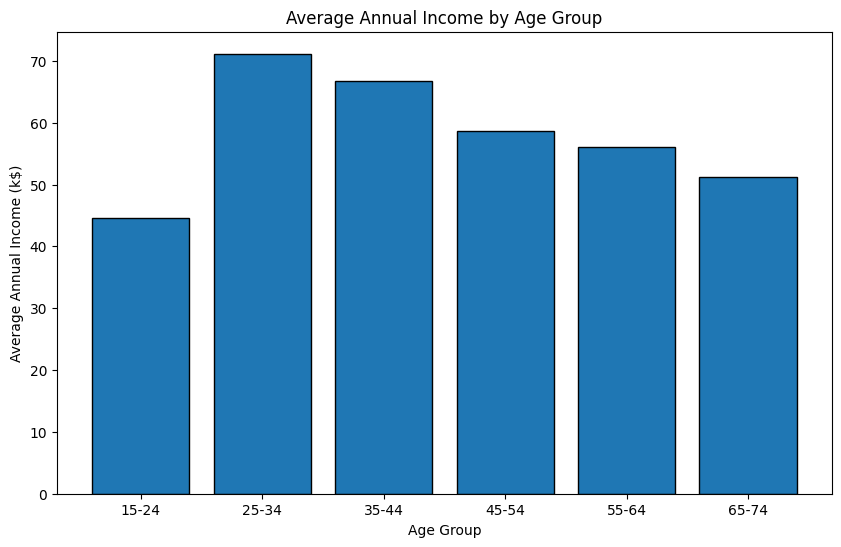

In [ ]:
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']

dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

# Calculate the average annual income for each age group
age_income_grouped = dataset.groupby('Age Group')['Annual Income (k$)'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_income_grouped['Age Group'], age_income_grouped['Annual Income (k$)'], edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income (k$)')
plt.title('Average Annual Income by Age Group')
plt.show()

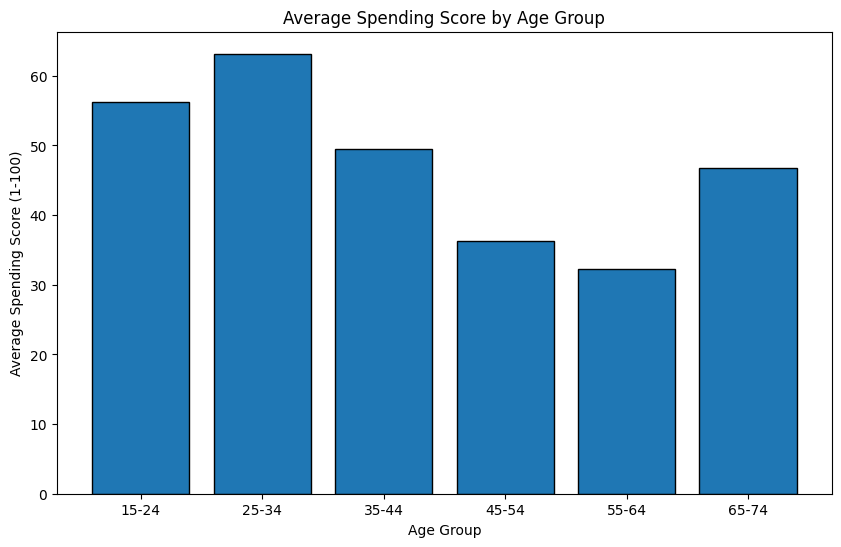

In [ ]:
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']
dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

# Step 2: Calculate the average spending score for each age group
age_spending_grouped = dataset.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

# Step 3: Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_spending_grouped['Age Group'], age_spending_grouped['Spending Score (1-100)'], edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Age Group')
plt.show()

In [ ]:
dataset = dataset.drop(columns=['CustomerID','Gender'])

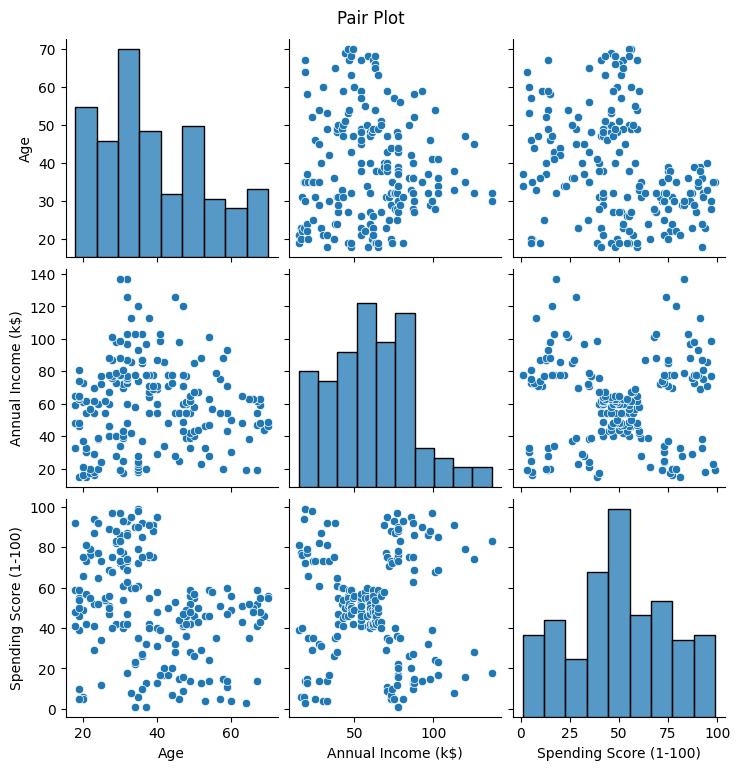

In [ ]:
sns.pairplot(dataset)
plt.suptitle("Pair Plot", y=1.02)
plt.show()

In [ ]:
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,19,15,39,15-24
1,21,15,81,15-24
2,20,16,6,15-24
3,23,16,77,15-24
4,31,17,40,25-34


In [ ]:
dataset = dataset.drop(columns=['Age Group'])

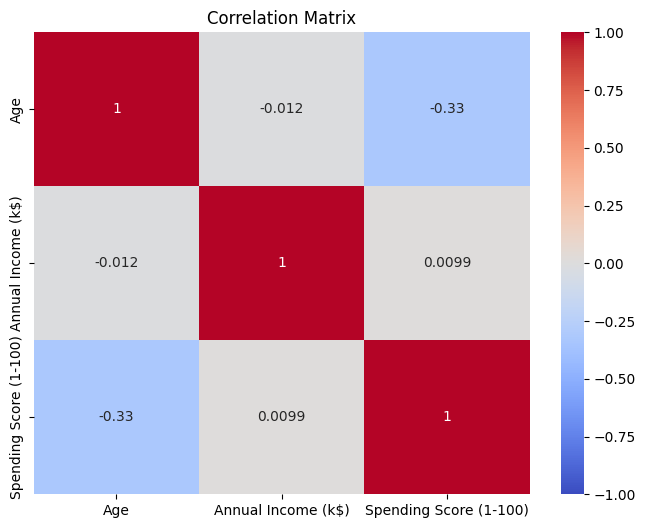

In [ ]:
corr_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

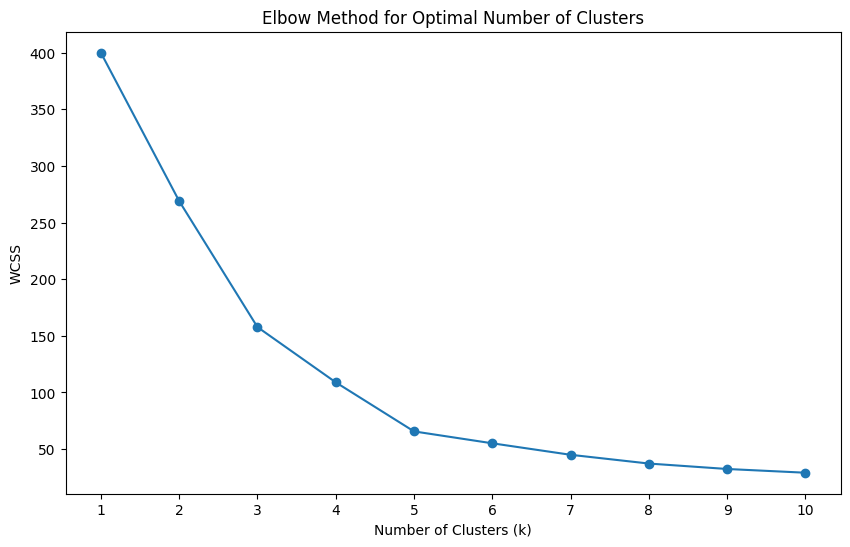

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
predicted =kmeans.fit_predict(X_scaled)
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
dataset['Cluster'] = predicted

In [ ]:
print(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        3
2     20                  16                       6        2
3     23                  16                      77        3
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        4
196   45                 126                      28        1
197   32                 126                      74        4
198   32                 137                      18        1
199   30                 137                      83        4

[200 rows x 4 columns]


In [ ]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

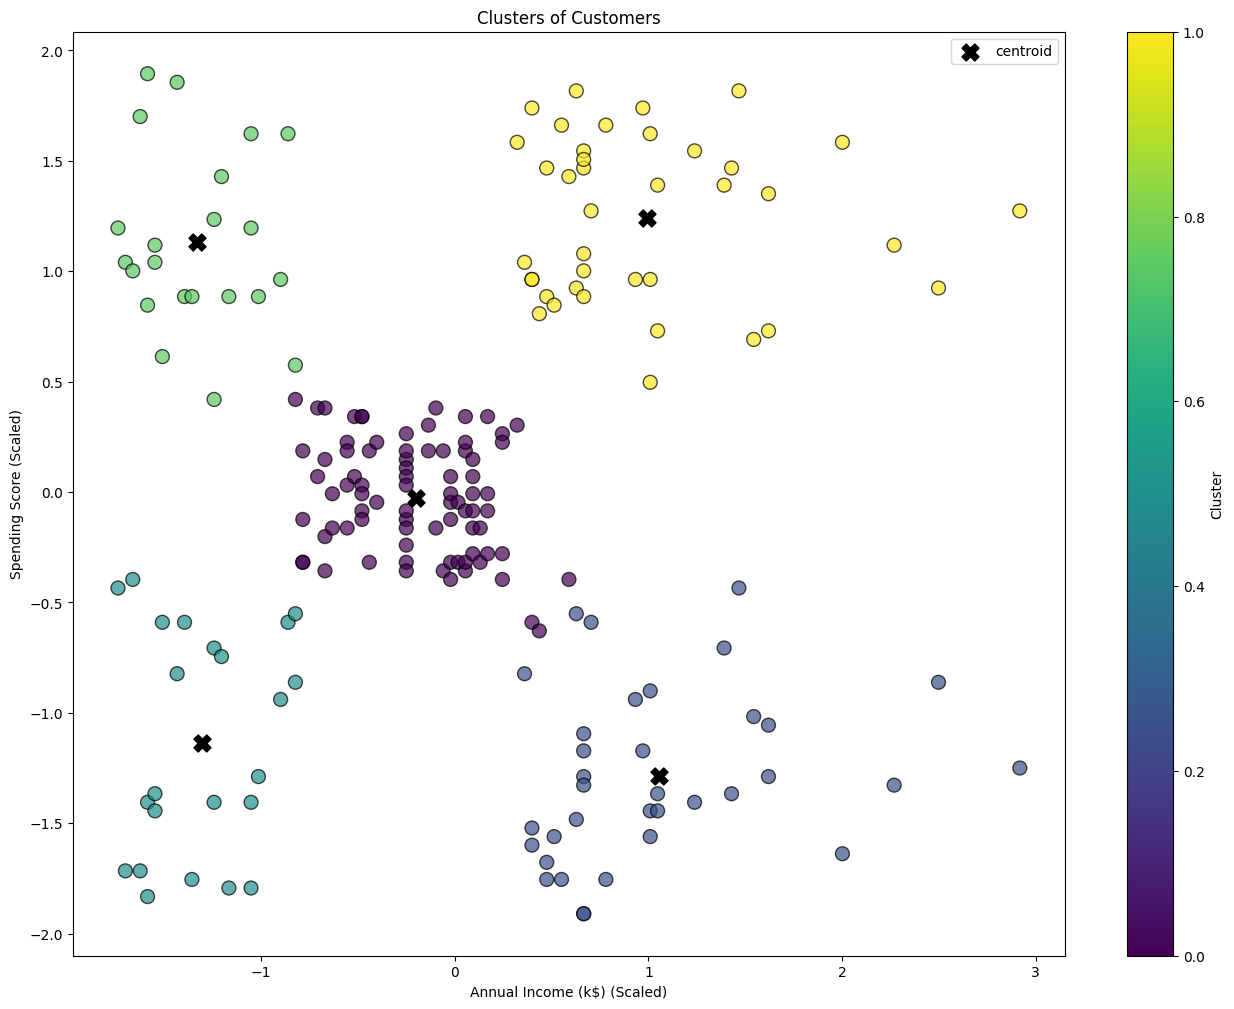

In [ ]:
plt.figure(figsize=(16, 12))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='X',s=150,label='centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia}")

Inertia (WCSS): 65.56840815571681
